# Building a Decision Tree machine learning model to know the Highly influencing attributes for Sales of a Company data

### Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Reading the Data

In [2]:
df=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\14. Decision Trees\Company_Data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No



# Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [8]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
 df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


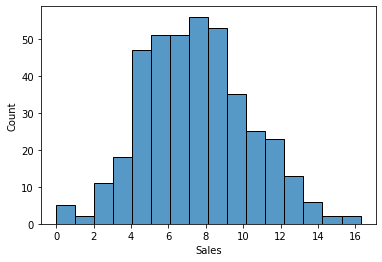

In [26]:
#Representation of Sales data by using histogram
sns.histplot(df['Sales'])
plt.show()

<AxesSubplot:xlabel='Income', ylabel='Count'>

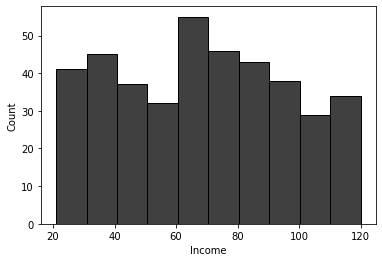

In [47]:
# Income Range of all the regions/locations
sns.histplot(df['Income'], color='black')

<AxesSubplot:>

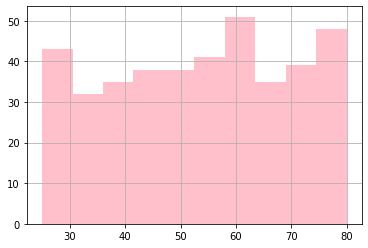

In [54]:
# Lets understand the age groups for the locations
df['Age'].hist(color='pink')

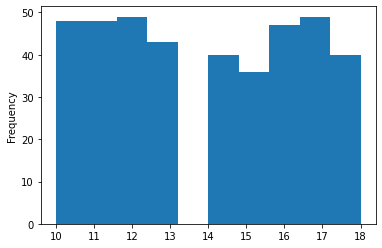

In [73]:
#Lets checkout the Education levels of customers 
df['Education'].plot(kind='hist')
plt.show()

In [28]:
# Describing the target variable
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [36]:
# Converting Numerical to Categorical for target variable
sales=[]
for row in df['Sales']:
    if row<7.49: sales.append('Bad')
    elif row>=7.49: sales.append('Good')
        

In [37]:
sales

['Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Goo

In [38]:
df['sales_label']=sales

In [39]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_label
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Bad
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Bad


<AxesSubplot:>

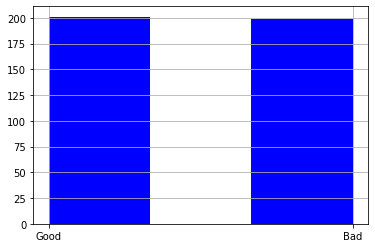

In [78]:
df['sales_label'].value_counts()
df['sales_label'].hist(bins=3, color='blue')

In [92]:
#Dropping Numeric Sales Columns from dataframe
df1=df.drop(columns='Sales')

In [43]:
df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_label
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Bad
4,141,64,3,340,128,Bad,38,13,Yes,No,Bad


## Converting Categorical Variables to Numerical variables

In [79]:
cols=['ShelveLoc', 'Urban','US','sales_label']

In [80]:
from sklearn.preprocessing import LabelEncoder

In [82]:
df1[cols]=df1[cols].apply(LabelEncoder().fit_transform)

In [84]:
df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_label
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [90]:
#Defining Dependent and Independent variables
x=df1.iloc[:, 0:10]
y=df1.iloc[:, 10]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [91]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: sales_label, dtype: int32

In [95]:
#Split the data for Training and Testing
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=40)

# Building Decision Tree Classifier Model with Entropy criteria

In [93]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [97]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.4583333333333333, 0.875, 'X[4] <= 101.5\nentropy = 0.999\nsamples = 320\nvalue = [155, 165]'),
 Text(0.25, 0.625, 'X[0] <= 123.5\nentropy = 0.741\nsamples = 81\nvalue = [17, 64]'),
 Text(0.16666666666666666, 0.375, 'X[4] <= 89.5\nentropy = 0.873\nsamples = 58\nvalue = [17, 41]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.469\nsamples = 30\nvalue = [3, 27]'),
 Text(0.25, 0.125, 'entropy = 1.0\nsamples = 28\nvalue = [14, 14]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.6666666666666666, 0.625, 'X[5] <= 0.5\nentropy = 0.983\nsamples = 239\nvalue = [138, 101]'),
 Text(0.5, 0.375, 'X[2] <= 14.0\nentropy = 0.537\nsamples = 57\nvalue = [50, 7]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.337\nsamples = 48\nvalue = [45, 3]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.991\nsamples = 9\nvalue = [5, 4]'),
 Text(0.8333333333333334, 0.375, 'X[5] <= 1.5\nentropy = 0.999\nsamples = 182\nvalue = [88, 94]'),
 Text(0.75, 0.125, 'entrop

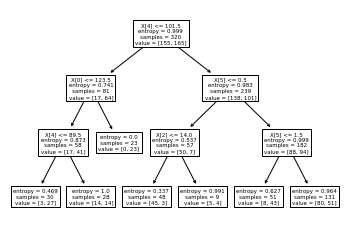

In [100]:
#Plotting Tree
from sklearn import tree
tree.plot_tree(model)

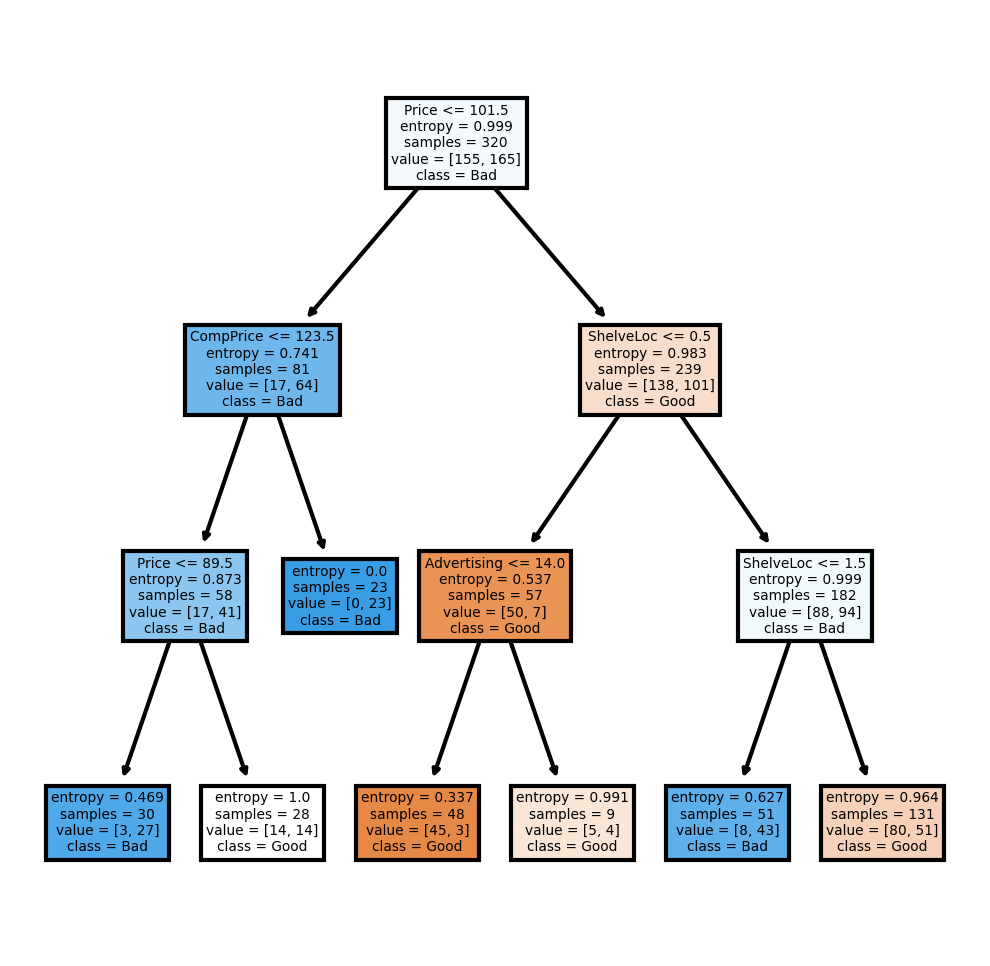

In [102]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Good','Bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [104]:
pred=model.predict(x_test)
pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [152]:
#Model Score On Testing Data with Enropy Criterion
model_test_score=np.mean(pred==y_test)
model_test_score

0.7

In [154]:
#model Score On Training Data wth Entropy Criterion
model_train_score=model.score(x_train,y_train)
model_train_score

0.740625

# Building a Decision Tree Model with Gini criteria

In [116]:
model_gini=DecisionTreeClassifier(criterion='gini', max_depth=3)

In [117]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

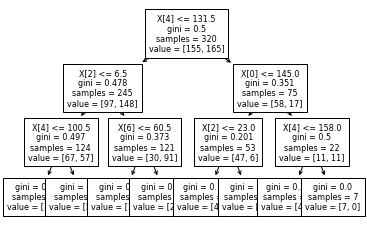

In [128]:
#Plotting Tree Model
tree.plot_tree(model_gini, fontsize=8)

plt.show()

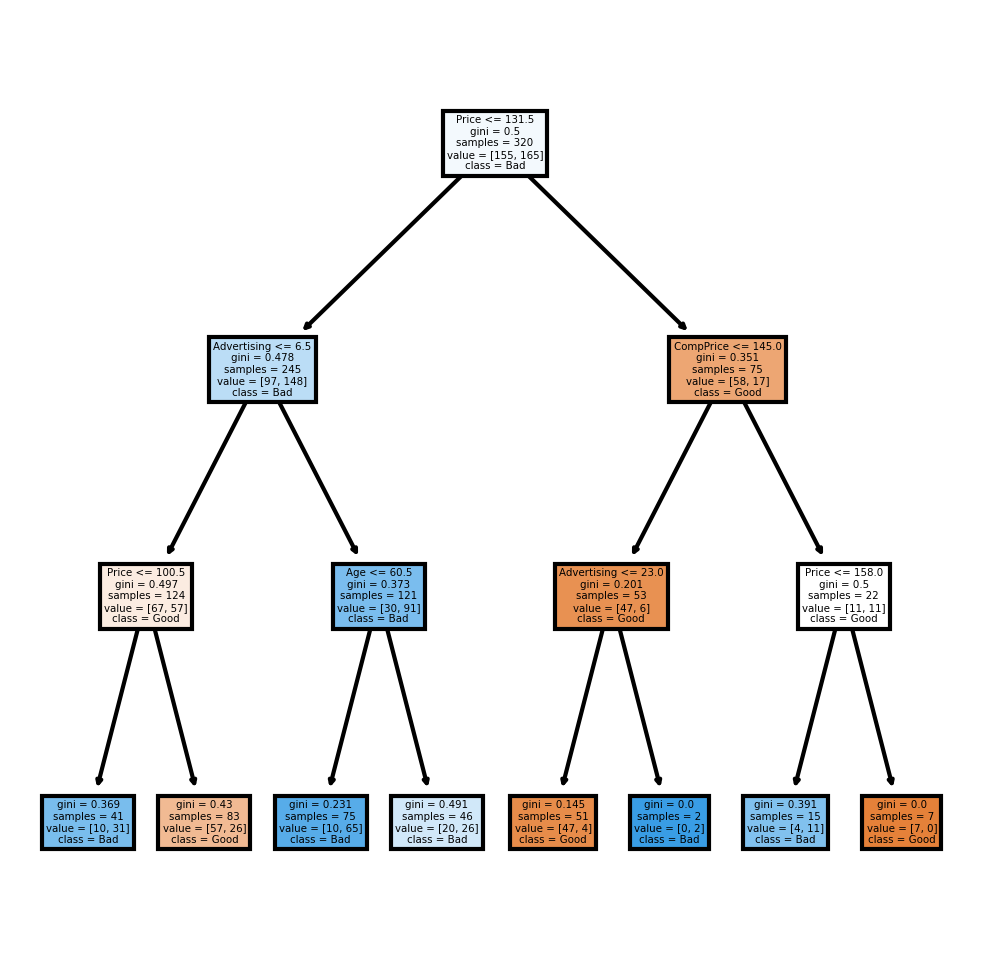

In [129]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Good','Bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [135]:
#Model score on training data with Gini criterion
gini_train_score=model_gini.score(x_train,y_train)
gini_train_score

0.76875

In [136]:
#Gini Model Predicitons
pred=model_gini.predict(x_test)
pred

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [145]:
#Predictions label count
pd.Series(pred).value_counts()

1    42
0    38
dtype: int64

In [146]:
#Test data label count
y_test.value_counts()

0    44
1    36
Name: sales_label, dtype: int64

In [137]:
# Model Score on Testing Data with Gini criterion
gini_test_score=np.mean(pred==y_test)
gini_test_score

0.7

In [147]:
model_gini.score(x_test,y_test)

0.7

# Building a Tree Model

In [148]:
df1.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_label'],
      dtype='object')

|--- Price <= 105.50
|   |--- Age <= 68.50
|   |   |--- Income <= 24.50
|   |   |   |--- class: 0
|   |   |--- Income >  24.50
|   |   |   |--- class: 1
|   |--- Age >  68.50
|   |   |--- Price <= 80.00
|   |   |   |--- class: 1
|   |   |--- Price >  80.00
|   |   |   |--- class: 0
|--- Price >  105.50
|   |--- ShelveLoc <= 0.50
|   |   |--- Advertising <= 15.50
|   |   |   |--- class: 0
|   |   |--- Advertising >  15.50
|   |   |   |--- class: 0
|   |--- ShelveLoc >  0.50
|   |   |--- ShelveLoc <= 1.50
|   |   |   |--- class: 1
|   |   |--- ShelveLoc >  1.50
|   |   |   |--- class: 0



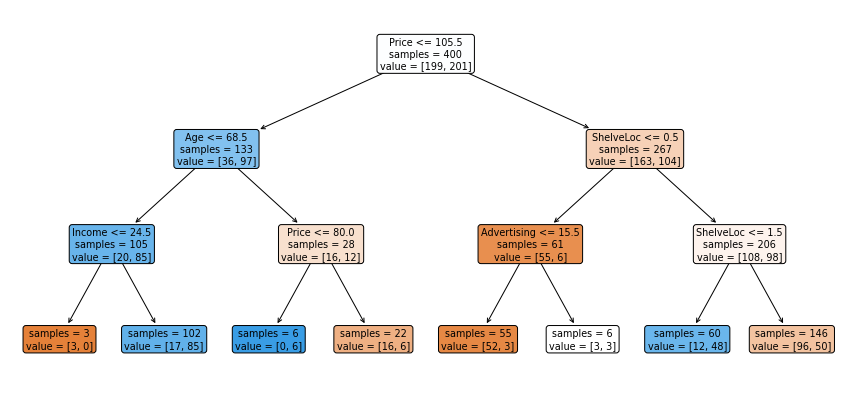

In [149]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=3)
DTree.fit(x,y)

##Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'])
print(export_text(DTree, feature_names = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']))

In [158]:
#Tree Model Score
DTree.score(x,y)

0.7725

# Tree Validation

In [159]:
##########Tree Validation
#Tree Validation
predict1 = DTree.predict(x)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y, predict1)
print (cm)

total = sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[170  29]
 [ 62 139]]
0.7725


# Pruning the Model

In [191]:
#training Tree Model
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 8, max_depth=3)
clf.fit(x_train,y_train)

predict1 = clf.predict(x_train)
predict2 = clf.predict(x_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Train Accuracy 0.76875
Test Accuracy 0.7


## Conclusion : We have got the Training model accuracy as 76.8% and Testing Accuracy as 70%